In [14]:
import cv2
import pytesseract

In [15]:
def preprocess(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply threshold
    threshold = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return threshold

In [16]:
def extract_text(img):
    return pytesseract.image_to_string(img)

In [17]:
import google.generativeai as genai
from dotenv import load_dotenv
import os
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")

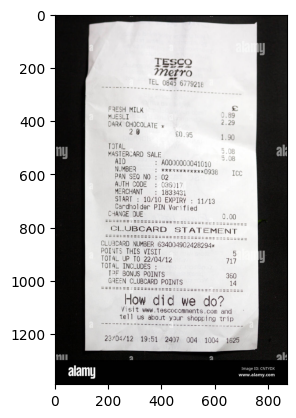

In [18]:
# image before preporcess
import matplotlib.pyplot as plt
image = plt.imread("test3.jpg")
plt.imshow(image)

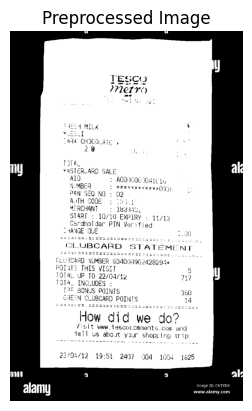

In [19]:

# Preprocess the image
_, processed_img = preprocess('test3.jpg')

# Plot the image
plt.imshow(processed_img, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [20]:
# extraction of the text from the image
extracted_text = extract_text(processed_img)
print(extracted_text)

TEscy
merry

41 MILK
T

“CHOCOLATE »
2@

va STE ReARD SALE
AID  ANONCOG G41 ¢ 15
NUMBER 1 OK Cor oA GE
PAN SEQ NO : 02
ASTH CODE teu.
MERCHANT =: Leg3qo.
START : 10/10 EXPIRY : 11713
Cardholder PIN Varifled
NRE DUE

CLURCARD NUMBER 634004902
POLS THIS VISIT
TOTAL UP TO 22/04/12
OTA. INCLUDES :
ae ws POINTS
cl UBCARD POINTS

How did We do?

Visit www. tascacomments com and
tell u abo ft “yur stop. ing trip

23/08/42 19:51 2497 904 1004 1625

al

Image ID: CNTYDX
www.alamy.com




In [28]:
import json
def ai_extract(text):
    prompt = """ You are a reciept parser AI. I am going to provide you with text from a reciept and I want you to extract the following information in the this structure: {'total','bussiness','items':[{'name','price','quantity'}],'address'}"""
    response = model.generate_content(prompt + text)
    response_text = response.text.strip().replace("```json","").strip().replace("```","")
    try:
        response_json = json.loads(response_text)
    except json.JSONDecodeError as e:
        print(f"error Decoding JSON {e}")
        response_json = {"error": response.text}
        
    return response_json, 


In [29]:
print(ai_extract(extracted_text))

error Decoding JSON Expecting value: line 1 column 1 (char 0)
({'error': "I cannot extract the requested information from the provided text.  The text appears to be a receipt image transcription, but it's highly fragmented and lacks clear organization.  Essential information like item names, prices, quantities, business name, and address are either missing or illegible.  The text includes seemingly random characters and numbers that do not correspond to standard receipt formatting.\n"},)
